# Titanic : Titanic: Machine Learning from Disaster

## first model

this model scored <u>0.76555</u> with n_estimators = 60

this model scored <u>0.75598</u> when set n_estimators to the value that gives max accuracy

https://www.kaggle.com/c/titanic/overview

This is the first model that I will iterate on , 

models used 
- RandomForestClassifier

features used :
- "SibSp","Fare","Parch" with normalization (mean and std norm)
- sex , embarked , pclass : on hot encoding applied
- other features has not been used 
    - age , cabin (missing data issues , will work on in further version)
    - other features need more analysis


In [1]:
import pandas
import numpy as np
from lib.helpers import convert_to_one_hot

In [2]:
dataset=pandas.read_csv('datasets/train.csv')
testset=pandas.read_csv("datasets/test.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
testset["Fare"]=testset["Fare"].map(lambda x: 32 if np.isnan(x) else x )
print testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [7]:
features=["Age","Pclass","Sex","SibSp","Fare","Embarked","Parch"]
dataset[features].tail()

,Age,Pclass,Sex,SibSp,Fare,Embarked,Parch
886,27.0,2,male,0,13.00,S,0
887,19.0,1,female,0,30.00,S,0
888,NaN,3,female,1,23.45,S,2
889,26.0,1,male,0,30.00,C,0
890,32.0,3,male,0,7.75,Q,0


In [8]:
#np.isnan(data["Age"])
data=dataset[~(pandas.isnull(dataset["Embarked"]))]
y=data["Survived"].as_matrix()
print y.shape

(889,)


In [9]:
sex=data['Sex'].map(lambda x: 1 if x == 'male' else 0 )
sex=convert_to_one_hot(sex,C=2)
sextest=testset["Sex"].map(lambda x: 1 if x == 'male' else 0 )
sextest=convert_to_one_hot(sextest,C=2)
print sex.shape,sextest.shape

(2, 889) (2, 418)


In [10]:
pclass=data["Pclass"]-1
pclass=convert_to_one_hot(pclass,C=3)
pclasstest=testset["Pclass"]-1
pclasstest=convert_to_one_hot(pclasstest,C=3)
print pclass.shape,pclasstest.shape

(3, 889) (3, 418)


In [11]:
embarked=data["Embarked"].map(lambda x: 0 if x == 'S' else (1 if x=='Q' else 2))
embarked=convert_to_one_hot(embarked,C=3)

embarkedtest=testset["Embarked"].map(lambda x: 0 if x == 'S' else (1 if x=='Q' else 2))
embarkedtest=convert_to_one_hot(embarkedtest,C=3)
print embarked.shape,embarkedtest.shape

(3, 889) (3, 418)


In [12]:
features=data[["SibSp","Fare","Parch"]].as_matrix().T
mean=features.mean(1).reshape(3,1)
std=features.std(1).reshape(3,1)
features=(features-mean)/std
featurestest=testset[["SibSp","Fare","Parch"]].as_matrix().T
featurestest=(featurestest-mean)/std
print features.shape,featurestest.shape

(3, 889) (3, 418)


In [13]:
features=np.concatenate((features,embarked,pclass,sex),axis=0)
featurestest=np.concatenate((featurestest,embarkedtest,pclasstest,sextest),axis=0)
print features.shape,featurestest.shape

(11, 889) (11, 418)


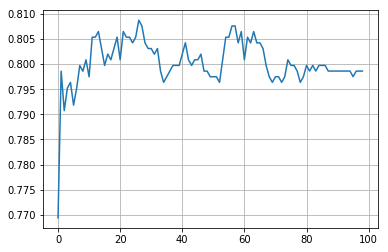

In [14]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
scoring='accuracy'
scores=[]
for num in range(1,100):
    clf = RandomForestClassifier(random_state=1,n_estimators=num)
    scr=cross_val_score(clf, features.T, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
         
import matplotlib.pyplot as plt
plt.plot(scores)
plt.grid()
plt.show()

In [15]:
mx=max(scores)
n_estimators=scores.index(mx)+1

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1,n_estimators=n_estimators)
clf.fit(features.T,y)
predclf=clf.predict(featurestest.T)

In [17]:
ids=testset["PassengerId"].as_matrix()
df = pandas.DataFrame({'PassengerId':ids, 'Survived': predclf})
print df
df.to_csv("output/predictionv1.csv", index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         1
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3